In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('IMDb Movies India.csv', encoding='latin-1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [4]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
15504,False
15505,False
15506,False
15507,False


In [5]:
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [6]:
df.empty

False

In [7]:
df.dropna()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [8]:
df.fillna('Unknown')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,Unknown,Unknown,Drama,Unknown,Unknown,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",Unknown,Unknown,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,Unknown,Unknown,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),Unknown,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),Unknown,Action,Unknown,Unknown,Kiran Thej,Sangeeta Tiwari,Unknown,Unknown
15507,Zulmi Shikari,(1988),Unknown,Action,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [9]:
categorical_columns = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
for col in categorical_columns:
    df[col] = df[col].fillna('Unknown')

In [10]:
df['Votes'] = df['Votes'].fillna(0)

In [11]:
df['Duration'] = df['Duration'].str.replace(' min', '', regex=False).astype(float)



In [12]:
df['Votes'] = df['Votes'].str.replace(',', '', regex=True)  # Remove commas
df['Votes'] = df['Votes'].str.replace('$', '', regex=True)  # Remove dollar signs
df['Votes'] = df['Votes'].str.replace('M', '', regex=True)  # Remove 'M' (assuming it represents millions)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce').fillna(0).astype(float)

In [13]:
df['Year'] = df['Year'].str.extract(r'(\d{4})').astype(float)


In [14]:
df = df.dropna(subset=['Year', 'Duration'])


In [15]:
categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [16]:
Y = df['Rating']


In [17]:
df = df.dropna(subset=['Rating'])

In [18]:
X = df.drop(columns=['Name', 'Rating'])
Y = df['Rating']


In [19]:
X = df.drop(columns=['Name', 'Rating'])
Y = df['Rating']


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [21]:
model = RandomForestRegressor(random_state=42)

In [22]:
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [23]:
y_pred = model.predict(X_test)

In [24]:
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
mape = mean_absolute_percentage_error(Y_test, y_pred)

In [25]:
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")

Mean Squared Error: 1.267155616567037
R² Score: 0.31892264898661427
Mean Absolute Error: 0.8251844577284374
Mean Absolute Percentage Error: 0.16502395946412465


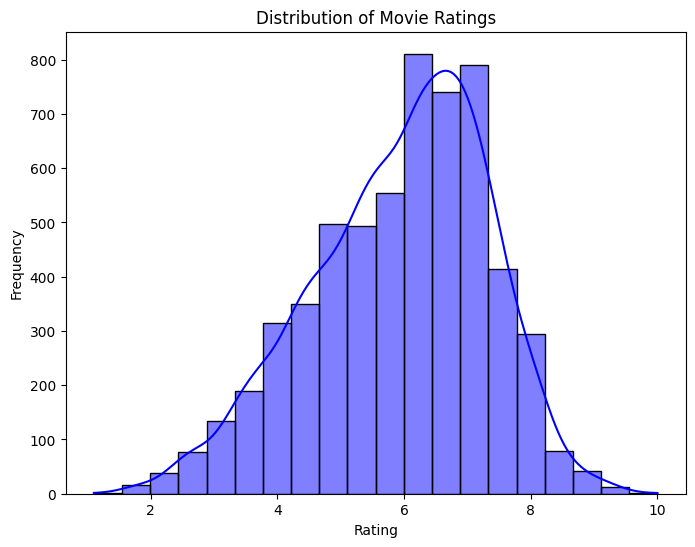

In [26]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

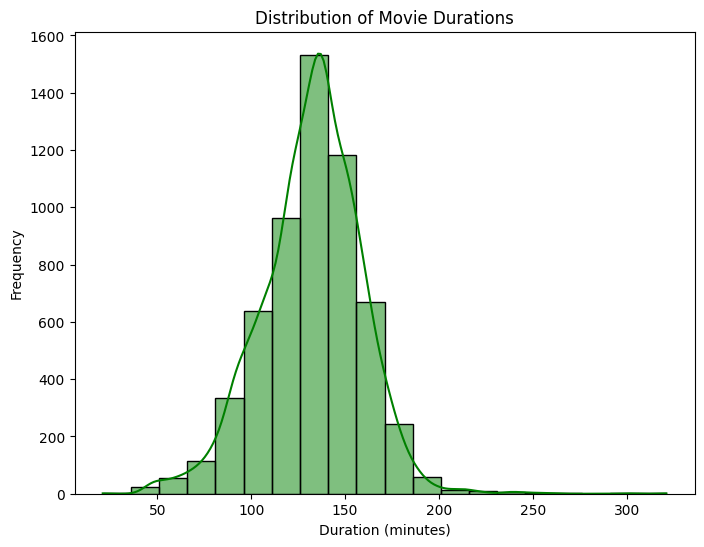

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Duration'], bins=20, kde=True, color='green')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

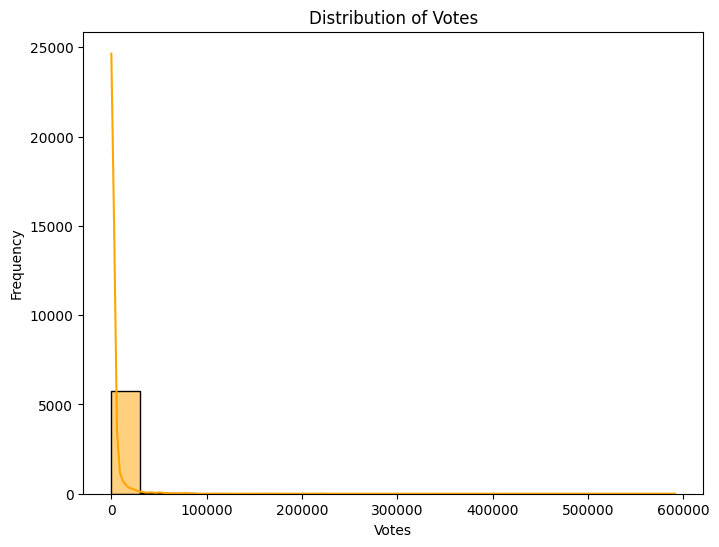

In [28]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Votes'], bins=20, kde=True, color='orange')
plt.title('Distribution of Votes')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.show()

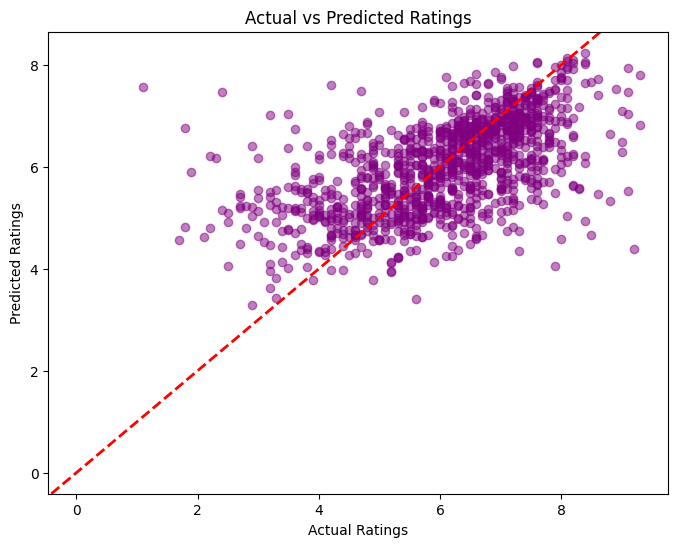

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred, alpha=0.5, color='purple')
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.axline((0, 0), slope=1, color='red', linestyle='--', linewidth=2)  # Ideal line
plt.show()

<ipython-input-30-f4e1a5d8302e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


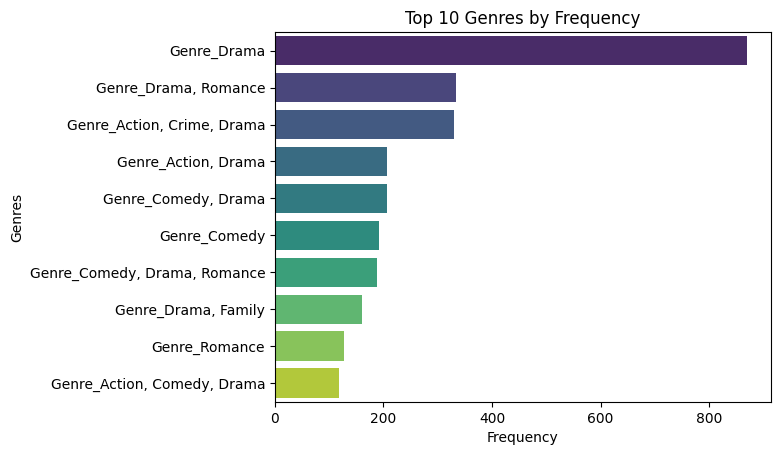

In [30]:
genre_counts = df[[col for col in df.columns if col.startswith('Genre_')]].sum().sort_values(ascending=False).head(10)
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top 10 Genres by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Genres')
plt.show()